<a href="https://colab.research.google.com/github/EverHernandez01/Senales_y-_Sistemas_2025_S2/blob/main/Soluci%C3%B3n_Taller/Respuesta_Impulso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caracterización de sistemas lineales e invariantes en el tiempo

## Respuesta al Impulso

- La respuesta $y(t)$ de un sistema lineal e invariante en el tiempo (SLIT) $\mathsf{H}\{\cdot\}$ respecto a una señal de entrada arbitraria $x(t),$ se puede obtner con base a la integral de convolución utilizando la [respuesta al impulso](https://en.wikipedia.org/wiki/Linear_time-invariant_system).

- La señal de entrada se puede representar como una integral cuando se aplica la propiedad de selectividad del impulso de Dirac:

\begin{equation}
x(t) = \int_{-\infty}^{\infty} x(\tau) \cdot \delta(t-\tau) \; d \tau
\end{equation}

- Empleando la relación anterior para la señal de entrada $x(t)$ sobre la señal de salida $y(t)=\mathsf{H}\{x(t)\}$ del sistema, se tiene que:

\begin{equation}
y(t) = \mathsf{H} \left\{ \int_{-\infty}^{\infty} x(\tau) \cdot \delta(t-\tau) \; d \tau \right\}
\end{equation}

donde $\mathsf{H}\{\cdot\}$ denota el operador de respuesta del sistema. El operador de integración y respuesta del sistema se pueden intercambiar bajo el supuesto de que el sistema es lineal:

\begin{equation}
y(t) = \int_{-\infty}^{\infty}  x(\tau) \cdot \mathsf{H} \left\{ \delta(t-\tau) \right\} \; d \tau
\end{equation}

donde $\mathsf{H}\{\cdot\}$ solo se aplica al impulso de Dirac, ya que $x(\tau)$ puede considerarse como un factor constante con respecto al tiempo $t$. Se hace evidente que la respuesta de un sistema a un impulso de Dirac juega un papel importante en el cálculo de la señal de salida para señales de entrada arbitrarias.

La respuesta de un sistema ante un impulso de dirac como entrada, se denomina [*respuesta al impulso*](https://en.wikipedia.org/wiki/Impulse_response). Se define como

\begin{equation}
h(t) = \mathsf{H} \left\{ \delta(t) \right\}
\end{equation}

Si el sistema es invariante en el tiempo, la respuesta a un impulso Dirac desplazado es $\mathsf{H}\left\{\delta(t-\tau)\right\} = h(t-\tau)$. Por lo tanto, para un SLIT se tiene que:

\begin{equation}
y(t) = \int_{-\infty}^{\infty}  x(\tau) \cdot h(t-\tau) \; d \tau
\end{equation}

La anterior operación se relaciona directamente con el operador [*convolución*](https://en.wikipedia.org/wiki/Convolution), definido $y(t)=x(t)*h(t)$.

Se puede concluir que las propiedades de un SLIT están completamente caracterizadas por su respuesta al impulso.

La respuesta $y(t)$ de un sistema a una señal de entrada arbitraria $x(t)$ está dada por la convolución de la señal de entrada $x(t)$ con su respuesta de impulso $h(t)$.

**Ejemplo**

El siguiente ejemplo considera un SLIT cuya relación entre la entrada $x(t)$ y la salida $y(t)$ está dada por una ecuación diferencial ordinaria (EDO) con coeficientes constantes

\begin{equation}
\frac{d}{dt} y(t)+ y(t) = x(t)
\end{equation}

La respuesta del sistema para la señal de entrada $x(t)=e^{-2t}\cdot\epsilon(t)$ se puede calcular mediante:

1. Se resuelve la [EDO](https://en.wikipedia.org/wiki/Ordinary_differential_equation).
2. Se calcula la respuesta al impulso $h(t)$ y se realiza la convolución con la entrada.

Generalmente se asumen condiciones iniciales $y(t)\big\vert_{t=0-}=0$ y $\frac{d}{dt}y(t)\big\vert_{t=0-}=0 $.

Primero, se define la EDO en `SymPy`

In [8]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t = sym.symbols('t', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)

ode = sym.Eq(y + y.diff(t) , x)#definir ecuacion en simpy con operador diferencial diff
ode

       d              
y(t) + ──(y(t)) = x(t)
       dt             

La EDO se resuelve para la señal de entrada dada con el fin de calcular la señal de salida. La constante de integración se calcula de forma que la solución cumpla las condiciones iniciales.

In [3]:
solution = sym.dsolve(ode.subs(x, sym.exp(-2*t)*sym.Heaviside(t)))#resolver edo ante entrada x(t)
#se definin condiciones iniciales 0
integration_constants = sym.solve( (solution.rhs.limit(t, 0, '-'), solution.rhs.diff(t).limit(t, 0, '-')), 'C1' )
y1 = solution.subs(integration_constants)
y1

       ⎛        -t     ⎞  -t
y(t) = ⎝θ(t) - ℯ  ⋅θ(t)⎠⋅ℯ  

Se grafica la solución de la EDO

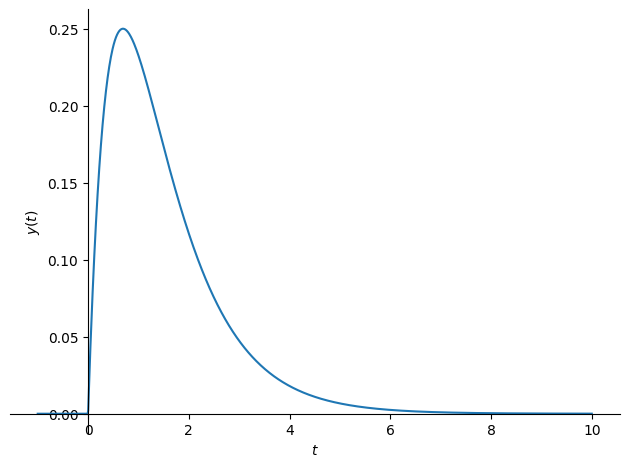

In [4]:
sym.plot(y1.rhs, (t,-1,10), ylabel=r'$y(t)$');

La respuesta al impulso $h(t)$ se puede calcular resolviendo la EDO para un impulso de Dirac como señal de entrada, $x(t)=\delta(t)$.

In [5]:
h = sym.Function('h')(t)
solution2 = sym.dsolve(ode.subs(x, sym.DiracDelta(t)).subs(y, h))#resolver para delta dirac
integration_constants = sym.solve( (solution2.rhs.limit(t, 0, '-'), solution2.rhs.diff(t).limit(t, 0, '-')), 'C1' )
h = solution2.subs(integration_constants)
h

        -t     
h(t) = ℯ  ⋅θ(t)

Se grafica la respuesta al impulso $h(t)$ del SLIT:

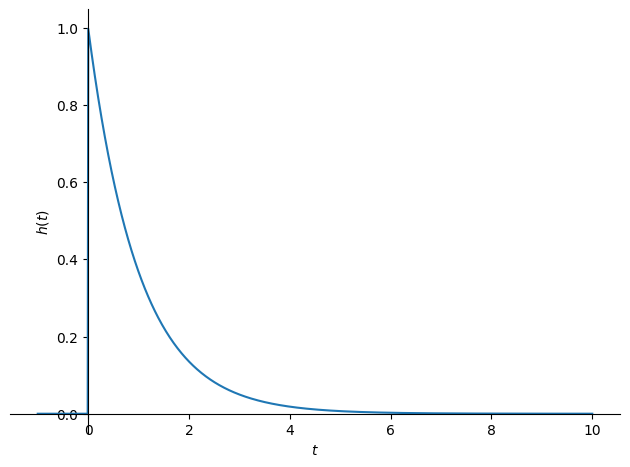

In [6]:
sym.plot(h.rhs, (t,-1,10), ylabel=r'$h(t)$');

Como alternativa a la solución explícita de la EDO, la respuesta del sistema se calcula evaluando la convolución $y(t)=x(t)*h(t)$.

**Nota**:Dado que `SymPy` no puede manejar la función Heaviside de manera adecuada en las integrales, la integral de convolución se simplifica primero. Tanto la señal de entrada $x(t)$ como la respuesta de impulso $h(t)$ son señales causales. Por lo tanto, la integral de convolución resulta en

\begin{equation}
y(t) = \int_{0}^{t} x(\tau) \cdot h(t - \tau) \; d\tau
\end{equation}

Para $t\geq0$. Observe que $y(t)=0$ para $t<0$.

In [10]:
tau = sym.symbols('tau', real=True)

y2 = sym.integrate(sym.exp(-2*tau) * h.rhs.subs(sym.Heaviside(t), 1).subs(t, t-tau), (tau, 0, t))
y2

 -t    -2⋅t
ℯ   - ℯ    

Se grafica la señal de salida obtenida mediante el proceso de convolución:

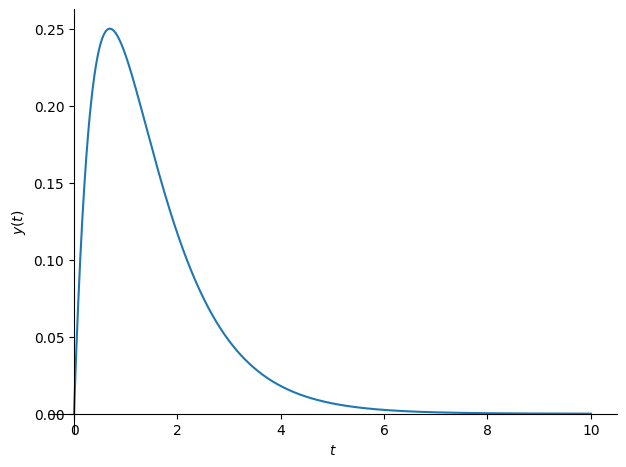

In [11]:
sym.plot(y2, (t,0,10), ylabel=r'$y(t)$');

**Ejercicio**

* A) Compare la señal de salida obtenida al resolver la EDO con la obtenida mediante la convolución. Son iguales?
* B) Compruebe la solución $h(t)$ de la EDO cuando $x(t)=\delta(t)$ de manera manual. Tener en cuenta que $\frac{d}{dt} \epsilon(t) = \delta(t)$.
* c) Comprobar la solución de la integral de convolución de manera manual. Tener en cuenta las funciones Heaviside.

* a)

El sistema analizado es un sistema lineal invariante en el tiempo (SLIT) descrito por la ecuación diferencial:
$$ \frac{d}{dt}y(t) + y(t) = x(t) $$
donde $x(t)$ es la señal de entrada y $y(t)$ la salida.

Para este tipo de sistemas, existen dos formas equivalentes de obtener la respuesta del sistema:

1. Resolviendo directamente la ecuación diferencial (método clásico de ecuaciones diferenciales ordinarias).
2. Mediante la convolución entre la entrada $x(t)$ y la respuesta al impulso $h(t)$:
$$ y(t) = x(t) * h(t) = \int_{0}^{t} x(\tau)h(t - \tau) d\tau $$

y1(t): (exp(t) - 1)*exp(-2*t)*Heaviside(t)
y2(t): (exp(t) - 1)*exp(-2*t)*Heaviside(t)
y1 - y2: 0


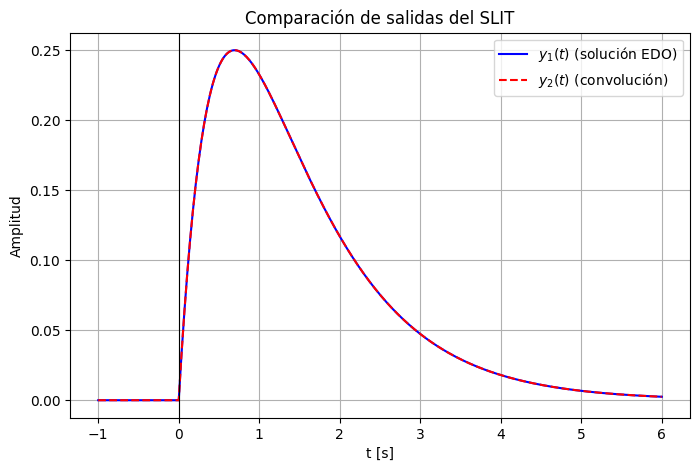


Error numérico máximo: 0.00e+00


In [22]:
# === EJEMPLO SLIT: Comparación EDO vs Convolución ===
%matplotlib inline
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

# === Definiciones simbólicas ===
t, tau = sym.symbols('t tau', real=True)
Heaviside = sym.Heaviside

# Respuesta al impulso h(t) = e^{-t} * u(t)
h = sym.exp(-t) * Heaviside(t)

# Entrada x(t) = e^{-2t} * u(t)
x = sym.exp(-2*t) * Heaviside(t)

# --- Cálculo por convolución ---
integrand = sym.exp(-2*tau) * h.subs(t, t - tau)  # x(τ)*h(t−τ)
y2 = sym.integrate(integrand, (tau, 0, t))
y2 = sym.simplify(y2 * Heaviside(t))              # forzar causalidad
y2_clean = y2.xreplace({Heaviside(t)**2: Heaviside(t)})  # simplificar Heaviside^2

# --- Solución de la EDO ---
y1_expr = sym.simplify((sym.exp(t) - 1)*sym.exp(-2*t) * Heaviside(t))

# --- Comparación simbólica ---
diff = sym.simplify(y1_expr - y2_clean)
print("y1(t):", sym.simplify(y1_expr))
print("y2(t):", sym.simplify(y2_clean))
print("y1 - y2:", diff)

# === Verificación numérica ===
y1_fn = sym.lambdify(t, y1_expr, 'numpy')
y2_fn = sym.lambdify(t, y2_clean, 'numpy')

T = np.linspace(-1, 6, 400)
y1_vals = y1_fn(T)
y2_vals = y2_fn(T)

# === Gráficas ===
plt.figure(figsize=(8,5))
plt.plot(T, y1_vals, 'b', label=r'$y_1(t)$ (solución EDO)')
plt.plot(T, y2_vals, 'r--', label=r'$y_2(t)$ (convolución)')
plt.axvline(0, color='k', lw=0.8)
plt.title('Comparación de salidas del SLIT')
plt.xlabel('t [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

# === Error numérico máximo ===
err = np.max(np.abs(y1_vals - y2_vals))
print(f"\nError numérico máximo: {err:.2e}")


*b)

Compruebe la solución  h(t)  de la EDO cuando  x(t)=δ(t)  de manera manual. Tener en cuenta que  ddtϵ(t)=δ(t) .
## Comprobación manual de \( h(t) \) cuando \( x(t) = \delta(t) \)

Queremos verificar que la función

$$
h(t) = e^{-t} \, \Theta(t)
$$

satisface la ecuación diferencial del sistema:

$$
\frac{d}{dt}h(t) + h(t) = \delta(t),
$$

teniendo en cuenta que

$$
\frac{d}{dt}\Theta(t) = \delta(t).
$$

---

### Paso 1. Derivada de \( h(t) \)

Aplicamos la regla del producto:

$$
\frac{d}{dt}h(t) = \frac{d}{dt}\big(e^{-t}\Theta(t)\big)
= \underbrace{\frac{d}{dt}e^{-t}}_{-e^{-t}}\Theta(t)
+ e^{-t}\underbrace{\frac{d}{dt}\Theta(t)}_{\delta(t)}.
$$

Entonces,

$$
\frac{d}{dt}h(t) = -e^{-t}\Theta(t) + e^{-t}\delta(t).
$$

---

### Paso 2. Sustitución en la EDO

Sustituyendo en la ecuación:

$$
\frac{d}{dt}h(t) + h(t)
= \big(-e^{-t}\Theta(t) + e^{-t}\delta(t)\big) + e^{-t}\Theta(t).
$$

Simplificamos los términos con \(\Theta(t)\):

$$
-e^{-t}\Theta(t) + e^{-t}\Theta(t) = 0,
$$

y queda:

$$
\frac{d}{dt}h(t) + h(t) = e^{-t}\delta(t).
$$

---

### Paso 3. Propiedad de la delta de Dirac

Usamos la propiedad de la función delta:

$$
f(t)\,\delta(t) = f(0)\,\delta(t),
$$

por lo tanto:

$$
e^{-t}\delta(t) = e^{0}\delta(t) = \delta(t).
$$

Así,

$$
\frac{d}{dt}h(t) + h(t) = \delta(t).
$$

---

### Paso 4. Conclusión

Se comprueba que la función

$$
\boxed{h(t) = e^{-t}\Theta(t)}
$$

satisface la ecuación diferencial del sistema cuando la entrada es un impulso $ \delta(t) $.  
Por tanto, $ h(t) $ representa correctamente la **respuesta al impulso** del sistema.

---

### Nota adicional

Otra forma de verificarlo es integrar la ecuación alrededor de \( t = 0 \):
$$
\int_{0^-}^{0^+} \big(h'(t) + h(t)\big)\,dt = \int_{0^-}^{0^+}\delta(t)\,dt = 1,
$$

lo que implica un salto unitario:

$$
h(0^+) - h(0^-) = 1.
$$

Asumiendo que $ h(0^-) = 0 $, se obtiene $ h(0^+) = 1 $.  
Para $ t > 0 $, la solución homogénea es $ h(t) = Ce^{-t} $, con $ C = 1 $,  
por lo tanto $ h(t) = e^{-t}\Theta(t) $, confirmando el resultado anterior.


*c)

## Comprobación manual de la solución de la integral de convolución

Para comprobar manualmente la salida del sistema, se evalúa la integral de convolución entre la entrada \( x(t) \) y la respuesta al impulso \( h(t) \):

$$
y(t) = (x * h)(t) = \int_{-\infty}^{\infty} x(\tau) \, h(t - \tau) \, d\tau.
$$

---

### Paso 1. Expresiones de las señales

Dado que el sistema es **causal**, las funciones están definidas como:

$$
x(t) = e^{-2t}\,\Theta(t),
\qquad
h(t) = e^{-t}\,\Theta(t).
$$

Por lo tanto, la integral de convolución se reduce a:

$$
y(t) = \int_{0}^{t} e^{-2\tau} \, e^{-(t-\tau)} \, d\tau,
\quad \text{para } t \ge 0,
$$

ya que las funciones Heaviside anulan la contribución fuera del intervalo \( [0, t] \).

---

### Paso 2. Simplificación del integrando

Multiplicando los exponentes:

$$
e^{-2\tau} \, e^{-(t-\tau)} = e^{-2\tau} \, e^{-t+\tau} = e^{-t} \, e^{-\tau}.
$$

Por tanto, la integral queda:

$$
y(t) = e^{-t} \int_{0}^{t} e^{-\tau} \, d\tau.
$$

---

### Paso 3. Evaluación de la integral

$$
\int_{0}^{t} e^{-\tau} \, d\tau = \left[-e^{-\tau}\right]_{0}^{t} = 1 - e^{-t}.
$$

Sustituyendo en la expresión de \( y(t) \):

$$
y(t) = e^{-t} (1 - e^{-t}).
$$

---

### Paso 4. Inclusión de la función Heaviside

Dado que el sistema es causal (\( y(t) = 0 \) para \( t < 0 \)),

$$
\boxed{
y(t) = (e^{-t} - e^{-2t})\,\Theta(t)
}.
$$

---

### Paso 5. Comparación con la solución de la EDO

La solución obtenida al resolver directamente la ecuación diferencial fue:

$$
y_{\text{EDO}}(t) = (e^{-t} - e^{-2t})\,\Theta(t).
$$

Por lo tanto,

$$
\boxed{y_{\text{convolución}}(t) = y_{\text{EDO}}(t)},
$$

confirmando que la integral de convolución y la solución de la EDO son equivalentes.  
Esto valida tanto la respuesta al impulso \( h(t) \) como el comportamiento causal del sistema.

---

### Interpretación física

La función Heaviside \( \Theta(t) \) asegura que el sistema **no responde antes de la aplicación de la señal de entrada**.  
La coincidencia entre ambas soluciones confirma que el sistema lineal e invariante en el tiempo (SLIT) responde de manera consistente,  
independientemente del método utilizado (EDO o convolución).


**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.

In [ ]:
# Compare la señal de salida obtenida al resolver la EDO con la obtenida mediante la convolución. Son iguales?
